In [1]:



import pandas as pd
import numpy as np
import random as rnd

from sklearn.cross_validation import KFold, cross_val_score

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



train_=pd.read_csv('../train_allcols.csv')
validate_=pd.read_csv('../validate_allcols.csv')
#test=pd.read_csv('../testwDSM.csv')

train_.shape, validate_.shape, #test.shape

/Users/arc/Codes/DM-Lab/dmlab/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((301619, 62), (148560, 62))

In [2]:
train = train_.query('DSMCRIT < 14')
validate = validate_.query('DSMCRIT < 14')
#print train['DSMCRIT'].value_counts()
print train.shape

(295879, 62)


In [3]:
#alcohol
#print train['DSMCRIT'].value_counts() / train['DSMCRIT'].count()
#print train['SUB1'].value_counts() / train['SUB1'].count()

In [4]:
#train.query('SUB1 == 4')['DSMCRIT'].value_counts() / train.query('SUB1 == 4')['DSMCRIT'].count()

In [5]:
#train.describe()
train = train.sample(10000)
validate = validate.sample(3000)
train.shape, #validate.shape, #validate.head(2)

((10000, 62),)

In [6]:
#train = train.query('SUB1 <= 10').query('SUB2 <= 10')
#validate = validate.query('SUB1 <= 10').query('SUB2 <= 10')

drop_list = ['DSMCRIT',  #'NUMSUBS'
             ]
drop_list_select = ['RACE', 'PREG', 'ARRESTS', 'PSYPROB', 'DETNLF', 'ETHNIC', 'MARSTAT', 'GENDER', 'EDUC'
                   ,'LIVARAG', 'EMPLOY', 'SUB3']

retain_list = ['RACE','PCPFLG','PRIMINC','LIVARAG','BENZFLG','HLTHINS','GENDER','ROUTE3','PRIMPAY',
               'MARSTAT','PSYPROB','ROUTE2','EMPLOY','SUB2','FRSTUSE3','FREQ3','FRSTUSE2','OTHERFLG',
               'EDUC','FREQ2','FREQ1','YEAR',
               'PSOURCE','DETCRIM','DIVISION','REGION','NOPRIOR','NUMSUBS','ALCDRUG',
               'METHUSE','FRSTUSE1','AGE','COKEFLG','OPSYNFLG','IDU','SERVSETA','ROUTE1','MARFLG',
               'MTHAMFLG','HERFLG',
               'ALCFLG','SUB1']
X_train = train[retain_list]
#X_train = train.drop(drop_list + drop_list_select, axis=1)
Y_train = train["DSMCRIT"]
X_validate = validate[retain_list]
Y_validate = validate["DSMCRIT"]
#X_test  = test.drop(drop_list, axis=1)
X_train.shape, #X_validate.shape, #X_test.shape



((10000, 42),)

In [7]:
print X_train.columns.tolist()

['RACE', 'PCPFLG', 'PRIMINC', 'LIVARAG', 'BENZFLG', 'HLTHINS', 'GENDER', 'ROUTE3', 'PRIMPAY', 'MARSTAT', 'PSYPROB', 'ROUTE2', 'EMPLOY', 'SUB2', 'FRSTUSE3', 'FREQ3', 'FRSTUSE2', 'OTHERFLG', 'EDUC', 'FREQ2', 'FREQ1', 'YEAR', 'PSOURCE', 'DETCRIM', 'DIVISION', 'REGION', 'NOPRIOR', 'NUMSUBS', 'ALCDRUG', 'METHUSE', 'FRSTUSE1', 'AGE', 'COKEFLG', 'OPSYNFLG', 'IDU', 'SERVSETA', 'ROUTE1', 'MARFLG', 'MTHAMFLG', 'HERFLG', 'ALCFLG', 'SUB1']


In [8]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif,chi2
#Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f = SelectKBest(f_classif, k=10)
Selector_f.fit(X_train,Y_train)

zipped = zip(X_train.columns.tolist(),Selector_f.scores_)
ans = sorted(zipped, key=lambda x: x[1])
for n,s in ans:
     print 'F-score: %3.2ft for feature %s' % (s,n)
        
        
#X_train= SelectKBest(f_classif, k=10).fit_transform(X_train, Y_train)


F-score: 14.86t for feature PCPFLG
F-score: 17.40t for feature RACE
F-score: 20.01t for feature LIVARAG
F-score: 20.41t for feature PRIMINC
F-score: 21.87t for feature HLTHINS
F-score: 23.02t for feature BENZFLG
F-score: 24.83t for feature ROUTE3
F-score: 26.93t for feature GENDER
F-score: 29.22t for feature ROUTE2
F-score: 30.98t for feature MARSTAT
F-score: 31.97t for feature PRIMPAY
F-score: 33.64t for feature EMPLOY
F-score: 40.14t for feature PSYPROB
F-score: 43.32t for feature FREQ3
F-score: 44.45t for feature SUB2
F-score: 44.70t for feature FRSTUSE3
F-score: 51.43t for feature FRSTUSE2
F-score: 57.43t for feature EDUC
F-score: 57.70t for feature FREQ2
F-score: 61.30t for feature FREQ1
F-score: 61.39t for feature OTHERFLG
F-score: 75.47t for feature DETCRIM
F-score: 81.84t for feature YEAR
F-score: 82.44t for feature PSOURCE
F-score: 89.35t for feature NOPRIOR
F-score: 92.73t for feature DIVISION
F-score: 94.10t for feature REGION
F-score: 104.41t for feature NUMSUBS
F-score: 11

In [9]:
#one hot
from sklearn import preprocessing

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_train)

# 3. Transform
onehotlabels = enc.transform(X_train).toarray()
X_train = onehotlabels

onehotlabels = enc.transform(X_validate).toarray()
X_validate = onehotlabels

X_train.shape, #X_validate.shape

((10000, 242),)

In [10]:
#kfold
kf = 3

In [11]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)

l_acc_log = cross_val_score(logreg, X_train, Y_train, cv=kf)
acc_log = round(np.mean(l_acc_log), 3)

l_acc_log = ['%.3f' % elem for elem in l_acc_log]
print l_acc_log
print acc_log

/Users/arc/Codes/DM-Lab/dmlab/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


['0.713', '0.722', '0.714']
0.716


In [12]:
# Random Forest (slow)

random_forest = RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1)
random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)

l_acc_random_forest = cross_val_score(random_forest, X_train, Y_train, cv=kf)
acc_random_forest = round(np.mean(l_acc_random_forest), 3)

l_acc_random_forest = ['%.3f' % elem for elem in l_acc_random_forest]
print l_acc_random_forest
print acc_random_forest

['0.722', '0.736', '0.723']
0.727


In [13]:
# Linear SVC
linear_svc = LinearSVC(C=1.0)
linear_svc.fit(X_train, Y_train)
#Y_pred = linear_svc.predict(X_test)

l_acc_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=kf)
acc_linear_svc = round(np.mean(l_acc_linear_svc), 3)
l_acc_linear_svc = ['%.3f' % elem for elem in l_acc_linear_svc]
print l_acc_linear_svc
print acc_linear_svc

['0.702', '0.711', '0.708']
0.707


In [14]:
print 'predict-sub2-woflags-newsplit-sample20000'
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest','Linear SVC'],
    'Cross Validation': [l_acc_log, 
              l_acc_random_forest, l_acc_linear_svc],
    'Cross Validation Mean': [acc_log, 
              acc_random_forest, acc_linear_svc]
    })
print models.sort_values(by='Cross Validation Mean', ascending=False)


predict-sub2-woflags-newsplit-sample20000
        Cross Validation  Cross Validation Mean                Model
1  [0.722, 0.736, 0.723]                  0.727        Random Forest
0  [0.713, 0.722, 0.714]                  0.716  Logistic Regression
2  [0.702, 0.711, 0.708]                  0.707           Linear SVC


Confusion matrix, without normalization
[[163  32   0   1   0   0  23   0]
 [  1 792   1  10   5   5  22   1]
 [  0   8 369   4   4   5   0   0]
 [  0   3   1 139   6   6   0   1]
 [  0   7   2   7 185   5   0  33]
 [  0  21  32  16  20 268   0   2]
 [  0 152   1   2   5   4 127   4]
 [  0  10   2   2  66   1   0  70]]
Normalized confusion matrix
[[ 0.74  0.15  0.    0.    0.    0.    0.11  0.  ]
 [ 0.    0.95  0.    0.01  0.01  0.01  0.03  0.  ]
 [ 0.    0.02  0.95  0.01  0.01  0.01  0.    0.  ]
 [ 0.    0.02  0.01  0.89  0.04  0.04  0.    0.01]
 [ 0.    0.03  0.01  0.03  0.77  0.02  0.    0.14]
 [ 0.    0.06  0.09  0.04  0.06  0.75  0.    0.01]
 [ 0.    0.52  0.    0.01  0.02  0.01  0.43  0.01]
 [ 0.    0.07  0.01  0.01  0.44  0.01  0.    0.46]]


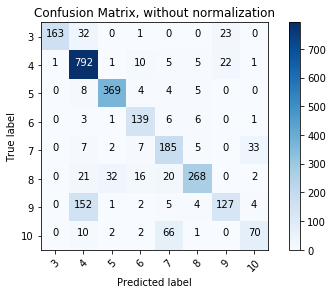

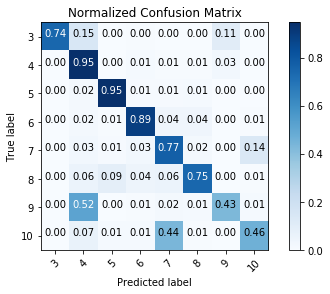

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = random_forest.predict(X_validate)


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_validate, Y_pred, labels=[3,4,5,6,7,8,9,10])

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = cm #confusion_matrix(y_test, Y_pred)
#class_names = ["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]
class_names = [3,4,5,6,7,8,9,10]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names,
                      title='Confusion Matrix, without normalization')


#plt.savefig('cnf matrix', dpi=150)
#plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

#plt.figure(figsize=(16,8))
#plt.savefig('cnf matrix norm', dpi=150)
plt.show()


In [16]:
print X_validate.shape,Y_pred.shape, Y_validate.shape
print  round(random_forest.score(X_validate, Y_validate) * 100, 2)


(3000, 242) (3000,) (3000,)
73.0
